In [1]:
import copy
import sys
sys.path.append( '..' )

from gene.utils import evaluate_bench, plot
from run import run

import jax.numpy as jnp
import jax.random as jrd
import matplotlib.pyplot as plt

## CMA-ES on Cartpole

In [2]:
config_gene = {
    "evo": {"strategy_name": "CMA_ES", "n_generations": 50, "population_size": 30},
    "net": {"layer_dimensions": [4, 32, 2]},
    "encoding": {"d": 3, "distance": "pL2", "type": "gene"},
    "problem": {"environnment": "CartPole-v1", "maximize": True},
}

config_direct = copy.deepcopy(config_gene)
config_direct["encoding"]["type"] = "direct"

In [3]:
rng = jrd.PRNGKey(0)

gene_results = evaluate_bench(run, config_gene, rng)
direct_results = evaluate_bench(run, config_direct, rng)

In [4]:
gene_results["population_center"]

DeviceArray([ 53.100002,  33.9     ,  90.4     ,  37.7     ,  69.      ,
             159.5     , 141.1     , 191.3     , 111.      , 103.4     ,
             165.3     , 192.90001 , 269.1     , 263.5     , 334.2     ,
             295.7     , 288.2     , 327.5     , 329.9     , 409.1     ,
             433.5     , 500.      , 422.5     , 392.5     , 461.6     ,
             370.4     , 480.9     , 418.80002 , 448.30002 , 455.      ,
             459.5     , 466.4     , 476.6     , 446.      , 491.4     ,
             484.2     , 446.1     , 471.      , 500.      , 500.      ,
             489.5     , 500.      , 471.4     , 487.30002 , 452.2     ,
             500.      , 500.      , 430.5     , 475.30002 , 500.      ],            dtype=float32)

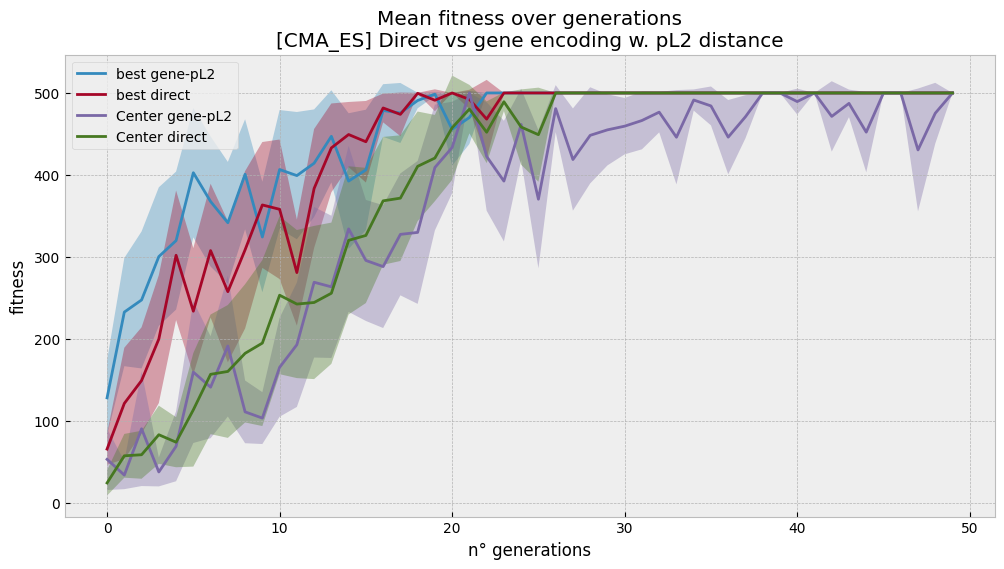

In [5]:
plot(
    (gene_results["fit_best"], gene_results["fit_best_std"], "best gene-pL2"),
    (direct_results["fit_best"], direct_results["fit_best_std"], "best direct"),
    (gene_results["population_center"], gene_results["population_std"], "Center gene-pL2"),
    (direct_results["population_center"], direct_results["population_std"], "Center direct"),
    
    info=f"[{config_gene['evo']['strategy_name']}] Direct vs gene encoding w. pL2 distance",
)

## Separabale CMA-ES on Cartpole

In [6]:
config_gene_sep_cma = copy.deepcopy(config_gene)
config_gene_sep_cma["evo"]["strategy_name"] = "Sep_CMA_ES"

config_direct_sep_cma = copy.deepcopy(config_gene_sep_cma)
config_direct_sep_cma["encoding"]["type"] = "direct"


In [7]:
rng = jrd.PRNGKey(0)

gene_results_sep_cma = evaluate_bench(run, config_gene_sep_cma, rng)
direct_results_sep_cma = evaluate_bench(run, config_direct_sep_cma, rng)

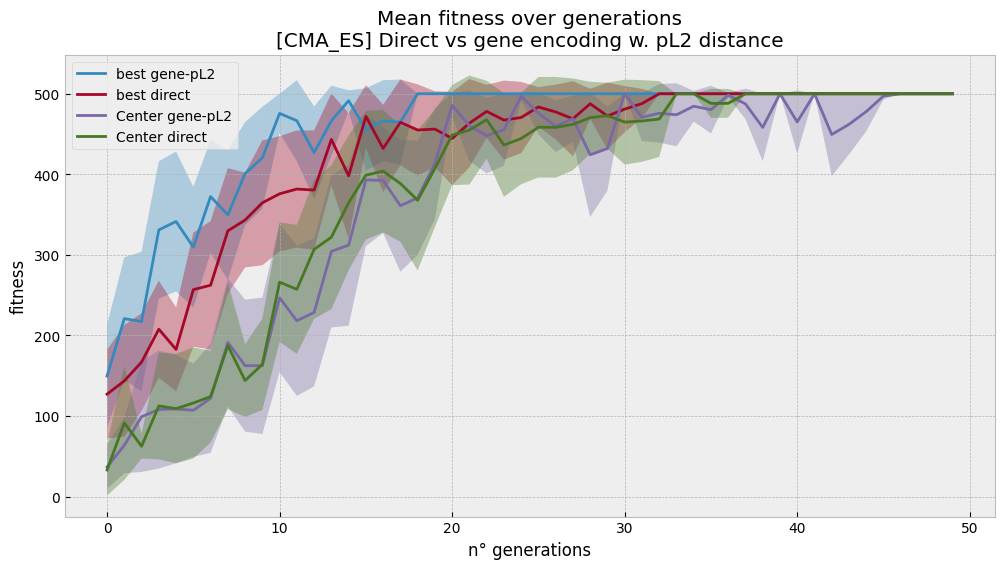

In [8]:
plot(
    (gene_results_sep_cma["fit_best"], gene_results_sep_cma["fit_best_std"], "best gene-pL2"),
    (direct_results_sep_cma["fit_best"], direct_results_sep_cma["fit_best_std"], "best direct"),
    (gene_results_sep_cma["population_center"], gene_results_sep_cma["population_std"], "Center gene-pL2"),
    (direct_results_sep_cma["population_center"], direct_results_sep_cma["population_std"], "Center direct"),

    info=f"[{config_gene_sep_cma['evo']['strategy_name']}] Direct vs gene encoding w. pL2 distance",
)